In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('crime.csv')
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [3]:
df['Date'] = df[['YEAR', 'MONTH', 'DAY']].apply(lambda s : pd.datetime(*s),axis = 1)


<ipython-input-3-83cfba531627>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Date'] = df[['YEAR', 'MONTH', 'DAY']].apply(lambda s : pd.datetime(*s),axis = 1)


In [4]:
df = df[['Date','TYPE', 'Longitude','Latitude']]
df = df.dropna()
df = df.rename(columns={'TYPE':'Type','Longitude':'X','Latitude':'Y'})
df

,Date,Type,X,Y
0,2003-05-12,Other Theft,-123.083763,49.269802
1,2003-05-07,Other Theft,-123.083763,49.269802
2,2003-04-23,Other Theft,-123.083763,49.269802
3,2003-04-20,Other Theft,-123.083763,49.269802
4,2003-04-12,Other Theft,-123.083763,49.269802
...,...,...,...,...
530647,2017-03-03,Break and Enter Residential/Other,-123.037595,49.277420
530648,2017-05-29,Mischief,-123.075129,49.264163
530649,2017-04-13,Offence Against a Person,0.000000,0.000000
530650,2017-06-05,Theft from Vehicle,-123.117031,49.278168


In [5]:
df = df[df.X != 0]
df.X.describe()

count    476290.000000
mean       -123.106826
std           0.037732
min        -124.549757
25%        -123.129328
50%        -123.113100
75%        -123.081366
max        -122.844597
Name: X, dtype: float64

In [6]:
df.Y.describe()

count    476290.000000
mean         49.262685
std           0.022465
min          49.073359
25%          49.249097
50%          49.268045
75%          49.281193
max          49.755314
Name: Y, dtype: float64

In [7]:
def crop(df, bbox=None, percentile_x=[0.01, 0.99], percentile_y=[0.01, 0.99]):
    if bbox:
        [min_x, max_x, min_y, max_y] = bbox
    else:
        min_x = df['X'].quantile(percentile_x[0])
        max_x = df['X'].quantile(percentile_x[1])
        min_y = df['Y'].quantile(percentile_y[0])
        max_y = df['Y'].quantile(percentile_y[1])
    df_cleaned = df[(df['X'] > min_x) & (df['X'] < max_x)
                    & (df['Y'] > min_y) & (df['Y'] < max_y)]
    return df_cleaned, (min_x, max_x, min_y, max_y)

df, (min_x, max_x, min_y, max_y) = crop(df)
df, _ = crop(df, bbox=(min_x, max_x, min_y, max_y))


min_x, max_x, min_y, max_y

(-123.194210809, -123.0264505, 49.20710708, 49.2927773567)

In [8]:
import geopandas
df =  geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.X, df.Y))
df = df.rename(columns={'geometry':'Location'})

In [9]:
df.to_csv('cropped.csv')
# df_post2016.to_csv('post2016_cropped.csv')

#
# df = pd.read_csv('311_cropped.csv')

In [10]:
# df['Location'] = df['Location'].apply(wkt.loads)

In [11]:
df

,Date,Type,X,Y,Location
0,2003-05-12,Other Theft,-123.083763,49.269802,POINT (-123.08376 49.26980)
1,2003-05-07,Other Theft,-123.083763,49.269802,POINT (-123.08376 49.26980)
2,2003-04-23,Other Theft,-123.083763,49.269802,POINT (-123.08376 49.26980)
3,2003-04-20,Other Theft,-123.083763,49.269802,POINT (-123.08376 49.26980)
4,2003-04-12,Other Theft,-123.083763,49.269802,POINT (-123.08376 49.26980)
...,...,...,...,...,...
530646,2017-01-18,Mischief,-123.074746,49.281276,POINT (-123.07475 49.28128)
530647,2017-03-03,Break and Enter Residential/Other,-123.037595,49.277420,POINT (-123.03760 49.27742)
530648,2017-05-29,Mischief,-123.075129,49.264163,POINT (-123.07513 49.26416)
530650,2017-06-05,Theft from Vehicle,-123.117031,49.278168,POINT (-123.11703 49.27817)


In [12]:
min_x, max_x, min_y, max_y = df['X'].min(), \
                             df['X'].max(),\
                             df['Y'].min(),\
                             df['Y'].max()

### Create 10x10 grids

In [13]:
from shapely.geometry import Polygon
from shapely import wkt
import seaborn as sn



def create_grids(min_x, max_x, min_y, max_y, num_x=10, num_y=10):
    xcoords = np.linspace(min_x, max_x, num_x+1)
    ycoords = np.linspace(min_y, max_y, num_y+1)
    grids = []
    indice = []
    for i in range(num_x):
        [x_left, x_right] = xcoords[i:i+2]
        for j in range(num_y):
            [y_bot, y_top] = ycoords[j:j+2]
            polygon = Polygon([(x_left, y_top), (x_right, y_top),
                             (x_right, y_bot), (x_left, y_bot)])
            grids.append(polygon)
            indice.append((i, j))
    df = pd.DataFrame({'grid number': np.arange(
        1, len(grids)+1), 'grid index': indice, 'polygon': grids})
    return grids, df


def count_events_in_grids(pts, grids):
    counts = []
    for i in range(len(grids)):
        count = np.array([grids[i].contains(pt) for pt in pts
                          ]).sum()
        counts.append(count)
    return np.array(counts)


def create_heatmap_time_series(df, grids, period=2,
                               rolling_window=False,
                               num_x=10, num_y=10,
                               min_date=None, max_date=None):
    heatmaps = {}

    # df['Date'] = pd.to_datetime(df['Date'])
    # df.index = df['Date']
    # df = df.sort_index()

    time_delta = np.timedelta64(period, 'D')

    start_date = min_date
    end_date = start_date+time_delta
    i = 0
    print("min date:{}, max date:{}".format(min_date,max_date))

    while end_date <= max_date:
        df_temp = df[start_date:end_date]
        h = count_events_in_grids(df_temp['Location'].values, grids)
        h.reshape(num_x, num_y)
        heatmaps[np.datetime_as_string(start_date, unit='D')] = h
        if rolling_window:
            start_date = start_date + np.timedelta64(1, 'D')
        else:
            start_date = end_date
        end_date = start_date + time_delta
        i+=1
        if i%365==0:
            print("processing for date: {}".format(end_date))
    return heatmaps
    print(end_date)

In [14]:
grids, df_grids = create_grids(min_x,max_x,min_y,max_y)
df_grids

,grid number,grid index,polygon
0,1,"(0, 0)","POLYGON ((-123.1942106 49.215675364, -123.1774..."
1,2,"(0, 1)","POLYGON ((-123.1942106 49.224242118, -123.1774..."
2,3,"(0, 2)","POLYGON ((-123.1942106 49.232808872, -123.1774..."
3,4,"(0, 3)","POLYGON ((-123.1942106 49.241375626, -123.1774..."
4,5,"(0, 4)","POLYGON ((-123.1942106 49.24994238, -123.17743..."
...,...,...,...
95,96,"(9, 5)","POLYGON ((-123.04322768 49.258509134, -123.026..."
96,97,"(9, 6)","POLYGON ((-123.04322768 49.267075888, -123.026..."
97,98,"(9, 7)","POLYGON ((-123.04322768 49.275642642, -123.026..."
98,99,"(9, 8)","POLYGON ((-123.04322768 49.284209396, -123.026..."


In [15]:
df_grids.to_csv('grids-10x10.csv')

### Extract daily time series of the heatmaps for all 5 categories of data

In [16]:

df.Type.value_counts()


Theft from Vehicle                                        164065
Mischief                                                   68030
Break and Enter Residential/Other                          58011
Other Theft                                                51902
Theft of Vehicle                                           36640
Break and Enter Commercial                                 32589
Theft of Bicycle                                           25068
Vehicle Collision or Pedestrian Struck (with Injury)       20703
Vehicle Collision or Pedestrian Struck (with Fatality)       234
Name: Type, dtype: int64

In [17]:
df = df[df['Type'].isin(df.Type.value_counts().index.values[:4])]


In [18]:
types = df.Type.value_counts().index.values
types

array(['Theft from Vehicle', 'Mischief',
       'Break and Enter Residential/Other', 'Other Theft'], dtype=object)

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df = df.sort_index()


<ipython-input-19-7a4808138f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [20]:
dfs = []
for i in range(len(types)):
  dfs.append(df[df['Type'] == types[i]])

len(dfs)

4

In [21]:
df.index.values.min(),df.index.values.max()

(numpy.datetime64('2003-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-07-13T00:00:00.000000000'))

In [22]:
train_periods = []
val_periods = []
test_periods = []
time_delta_9 = np.timedelta64(700, 'D')
time_delta_1 = np.timedelta64(100,'D')
time_delta_2 = np.timedelta64(200,'D')
start = np.datetime64('2003-01-01')
max_date = np.datetime64('2017-07-01')
print(max_date-start)


5295 days


In [23]:
end = start
while end<max_date:
    end = start + time_delta_9
    if end>max_date:
        end = max_date
        train_periods.append((start, end))
        break
    train_periods.append((start, end))
    start = end
    end = start + time_delta_1
    val_periods.append((start, end))
    start = end
    end = start + time_delta_2
    if end+time_delta_9>max_date:
        end = max_date
    test_periods.append((start, end))
    start = end

In [24]:
train_periods

[(numpy.datetime64('2003-01-01'), numpy.datetime64('2004-12-01')),
 (numpy.datetime64('2005-09-27'), numpy.datetime64('2007-08-28')),
 (numpy.datetime64('2008-06-23'), numpy.datetime64('2010-05-24')),
 (numpy.datetime64('2011-03-20'), numpy.datetime64('2013-02-17')),
 (numpy.datetime64('2013-12-14'), numpy.datetime64('2015-11-14'))]

In [25]:
hmaps_train_all = []

for train_period in train_periods:
    hmaps_train = []
    for i in range(len(types)):
        min_date, max_date = train_period
        train = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_train = np.array(list(train.values())).reshape((-1,10,10))
        hmaps_train.append(hmap_train)
    hmaps_train = np.stack(hmaps_train,axis=1)
    hmaps_train_all.append(hmaps_train)

min date:2003-01-01, max date:2004-12-01
processing for date: 2004-01-08
min date:2003-01-01, max date:2004-12-01
processing for date: 2004-01-08
min date:2003-01-01, max date:2004-12-01
processing for date: 2004-01-08
min date:2003-01-01, max date:2004-12-01
processing for date: 2004-01-08
min date:2005-09-27, max date:2007-08-28
processing for date: 2006-10-04
min date:2005-09-27, max date:2007-08-28
processing for date: 2006-10-04
min date:2005-09-27, max date:2007-08-28
processing for date: 2006-10-04
min date:2005-09-27, max date:2007-08-28
processing for date: 2006-10-04
min date:2008-06-23, max date:2010-05-24
processing for date: 2009-06-30
min date:2008-06-23, max date:2010-05-24
processing for date: 2009-06-30
min date:2008-06-23, max date:2010-05-24
processing for date: 2009-06-30
min date:2008-06-23, max date:2010-05-24
processing for date: 2009-06-30
min date:2011-03-20, max date:2013-02-17
processing for date: 2012-03-26
min date:2011-03-20, max date:2013-02-17
processing

In [26]:
print(hmaps_train_all[0].shape)
data_train = np.concatenate(hmaps_train_all, axis = 0)
print(data_train.shape)
np.save('train', data_train)
np.save('train_by_periods', np.array(hmaps_train_all, dtype=object))
np.array(hmaps_train_all, dtype=object).shape

(694, 4, 10, 10)
(3470, 4, 10, 10)


(5, 694, 4, 10, 10)

In [27]:
hmaps_train_all[2][:,0].sum()

144160

In [28]:
hmaps_valid_all = []

for val_period in val_periods:
    hmaps_val = []
    for i in range(len(types)):
        min_date, max_date = val_period
        val = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_val = np.array(list(val.values())).reshape((-1,10,10))
        hmaps_val.append(hmap_val)
    hmaps_val = np.stack(hmaps_val,axis=1)
    hmaps_valid_all.append(hmaps_val)

min date:2004-12-01, max date:2005-03-11
min date:2004-12-01, max date:2005-03-11
min date:2004-12-01, max date:2005-03-11
min date:2004-12-01, max date:2005-03-11
min date:2007-08-28, max date:2007-12-06
min date:2007-08-28, max date:2007-12-06
min date:2007-08-28, max date:2007-12-06
min date:2007-08-28, max date:2007-12-06
min date:2010-05-24, max date:2010-09-01
min date:2010-05-24, max date:2010-09-01
min date:2010-05-24, max date:2010-09-01
min date:2010-05-24, max date:2010-09-01
min date:2013-02-17, max date:2013-05-28
min date:2013-02-17, max date:2013-05-28
min date:2013-02-17, max date:2013-05-28
min date:2013-02-17, max date:2013-05-28
min date:2015-11-14, max date:2016-02-22
min date:2015-11-14, max date:2016-02-22
min date:2015-11-14, max date:2016-02-22
min date:2015-11-14, max date:2016-02-22


In [29]:
print(hmaps_valid_all[0].shape)
data_valid = np.concatenate(hmaps_valid_all, axis = 0)
np.save('valid', data_valid)
np.save('valid_by_periods', np.array(hmaps_valid_all))
np.array(hmaps_valid_all).shape

(94, 4, 10, 10)


(5, 94, 4, 10, 10)

In [30]:
hmaps_test_all = []

for test_period in test_periods:
    hmaps_test = []
    for i in range(len(types)):
        min_date, max_date = test_period
        val = create_heatmap_time_series(dfs[i], grids,
                                         rolling_window=True, period=7,
                                         min_date = min_date,
                                         max_date = max_date)
        hmap_test = np.array(list(val.values())).reshape((-1,10,10))
        hmaps_test.append(hmap_test)
    hmaps_test = np.stack(hmaps_test,axis=1)
    hmaps_test_all.append(hmaps_test)

min date:2005-03-11, max date:2005-09-27
min date:2005-03-11, max date:2005-09-27
min date:2005-03-11, max date:2005-09-27
min date:2005-03-11, max date:2005-09-27
min date:2007-12-06, max date:2008-06-23
min date:2007-12-06, max date:2008-06-23
min date:2007-12-06, max date:2008-06-23
min date:2007-12-06, max date:2008-06-23
min date:2010-09-01, max date:2011-03-20
min date:2010-09-01, max date:2011-03-20
min date:2010-09-01, max date:2011-03-20
min date:2010-09-01, max date:2011-03-20
min date:2013-05-28, max date:2013-12-14
min date:2013-05-28, max date:2013-12-14
min date:2013-05-28, max date:2013-12-14
min date:2013-05-28, max date:2013-12-14
min date:2016-02-22, max date:2017-07-01
processing for date: 2017-02-28
min date:2016-02-22, max date:2017-07-01
processing for date: 2017-02-28
min date:2016-02-22, max date:2017-07-01
processing for date: 2017-02-28
min date:2016-02-22, max date:2017-07-01
processing for date: 2017-02-28


In [31]:
print(hmaps_test_all[0].shape)
data_test = np.concatenate(hmaps_test_all, axis = 0)
np.save('test', data_valid)
np.save('test_by_periods', np.array(hmaps_valid_all))
np.array(hmaps_test_all).shape

(194, 4, 10, 10)


<ipython-input-31-ecc16ddb86c3>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(hmaps_test_all).shape


(5,)

In [32]:
len(train)

694

In [33]:
from sklearn.model_selection import train_test_split
m=5
n=3
step = 7
seq = []
for data_train in hmaps_train_all:
    for t0 in range(len(data_train)-(m+n)*step+1):
          observed = data_train[t0:t0+step*m:step]
          target = data_train[t0+step*m:t0+step*(m+n):step]
          seq.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_train', seq)

In [34]:
len(seq)

3195

In [35]:
m=5
n=3
step = 7
seq_val = []
for data_valid in hmaps_valid_all:
    for t0 in range(len(data_valid)-(m+n)*step+1):
          observed = data_valid[t0:t0+step*m:step]
          target = data_valid[t0+step*m:t0+step*(m+n):step]
          seq_val.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_valid', seq_val)
len(seq_val)

195

In [36]:
m=5
n=3
step = 7
seq_test = []
for data_test in hmaps_test_all:
    for t0 in range(len(data_test)-(m+n)*step+1):
          observed = data_test[t0:t0+step*m:step]
          target = data_test[t0+step*m:t0+step*(m+n):step]
          seq_test.append(np.append(observed, target,axis=0))
    #seq shape: (N-(m+n)*step+1,m+n,1,10,10)

np.save('seq_test', seq_test)
len(seq_test)

990

In [37]:
np.array(seq).shape

(3195, 8, 4, 10, 10)

In [38]:
np.sum(data_train, axis=(0,2,3))

array([145978,  64200,  43287,  66971])

In [39]:
np.sum(data_valid, axis=(0,2,3))

array([27941,  8590,  8029, 10358])

## heatmap at ts=1 of different categories

<AxesSubplot:>

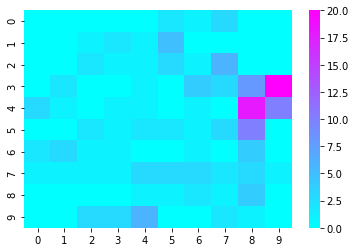

In [40]:
sn.heatmap(data_train[0,0],cmap='cool')

<AxesSubplot:>

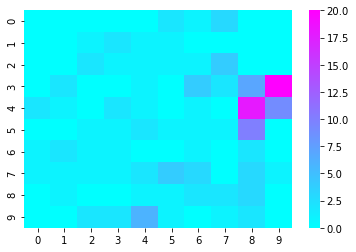

In [41]:

sn.heatmap(hmaps_train_all[-1][1,0],cmap='cool')

<AxesSubplot:>

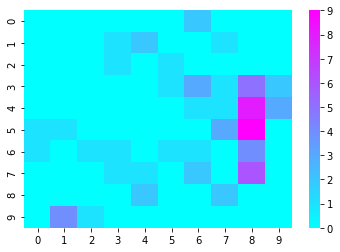

In [42]:
sn.heatmap(data_train[0,1],cmap='cool')

<AxesSubplot:>

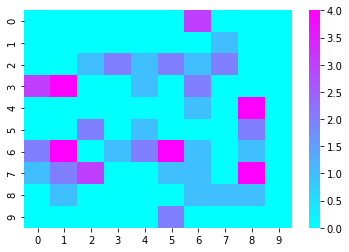

In [43]:
sn.heatmap(data_train[0,2],cmap='cool')

<AxesSubplot:>

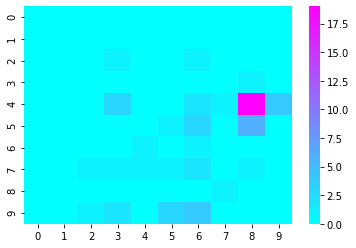

In [44]:
sn.heatmap(data_train[0,3],cmap='cool')